In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.shape

(1338, 7)

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.duplicated().sum()

1

In [12]:
data.drop_duplicates(keep='first', inplace=True)

print('the total number of duplicated rows:',data.duplicated().sum())

the total number of duplicated rows: 0


In [13]:
data.duplicated().sum()

0

In [14]:
categorical_cols= list(data.select_dtypes(include='object'))
print('List of categorical columns:',categorical_cols)
numerical_cols= list(data.select_dtypes(include='number'))
print('list of numerical columns: ',numerical_cols)

List of categorical columns: ['sex', 'smoker', 'region']
list of numerical columns:  ['age', 'bmi', 'children', 'charges']


In [15]:
data[numerical_cols].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
data[categorical_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [17]:
data['smoker'] = data['smoker'].replace(to_replace=['no' , 'yes'], value=[0,1])
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [18]:
data['bmi_categories'] = pd.cut(data['bmi'], bins=[0, 18.4, 24.9, 39.9, np.inf],labels=['Underweight', 'Normal weight','Overweight', 'Obese'])

In [19]:
data['bmi_categories']

0          Overweight
1          Overweight
2          Overweight
3       Normal weight
4          Overweight
            ...      
1333       Overweight
1334       Overweight
1335       Overweight
1336       Overweight
1337       Overweight
Name: bmi_categories, Length: 1337, dtype: category
Categories (4, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese']

In [20]:
stat_result = data.groupby(['bmi_categories'])\
['charges'].agg(['mean','median', 'min', 'max']).round(2)

In [21]:
stat_result

,mean,median,min,max
bmi_categories,,,,
Underweight,8852.20,6759.26,1621.34,32734.19
Normal weight,10379.50,8604.15,1121.87,35069.37
Overweight,13695.41,9467.51,1131.51,62592.87
Obese,16667.61,9748.91,1146.80,63770.43


<Axes: xlabel='region', ylabel='charges'>

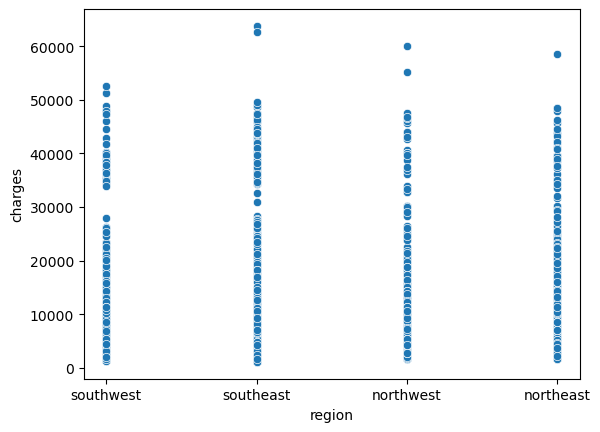

In [22]:
sns.scatterplot(x="region", y="charges", data=data)

In [23]:
data.corr

<bound method DataFrame.corr of       age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0       1  southwest  16884.92400   
1      18    male  33.770         1       0  southeast   1725.55230   
2      28    male  33.000         3       0  southeast   4449.46200   
3      33    male  22.705         0       0  northwest  21984.47061   
4      32    male  28.880         0       0  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1333   50    male  30.970         3       0  northwest  10600.54830   
1334   18  female  31.920         0       0  northeast   2205.98080   
1335   18  female  36.850         0       0  southeast   1629.83350   
1336   21  female  25.800         0       0  southwest   2007.94500   
1337   61  female  29.070         0       1  northwest  29141.36030   

     bmi_categories  
0        Overweight  
1        Overweight  
2        Overweight  
3     Normal weight  
4    

In [24]:
data.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0       1  southwest  16884.92400   
1      18    male  33.770         1       0  southeast   1725.55230   
2      28    male  33.000         3       0  southeast   4449.46200   
3      33    male  22.705         0       0  northwest  21984.47061   
4      32    male  28.880         0       0  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1333   50    male  30.970         3       0  northwest  10600.54830   
1334   18  female  31.920         0       0  northeast   2205.98080   
1335   18  female  36.850         0       0  southeast   1629.83350   
1336   21  female  25.800         0       0  southwest   2007.94500   
1337   61  female  29.070         0       1  northwest  29141.36030   

     bmi_categories  
0        Overweight  
1        Overweight  
2        Overweigh

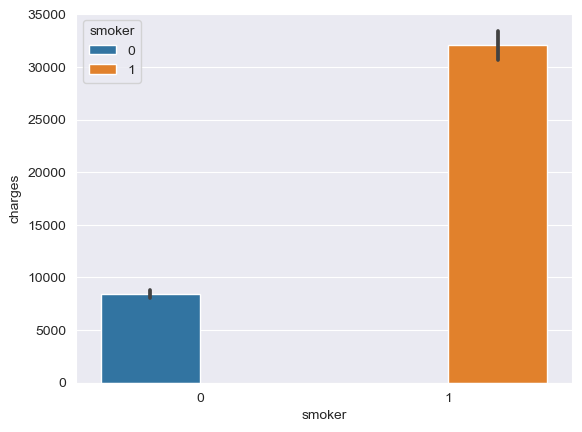

In [25]:
sns.set_style("darkgrid")
sns.barplot(x = data["smoker"],y = data['charges'],hue=data['smoker']);

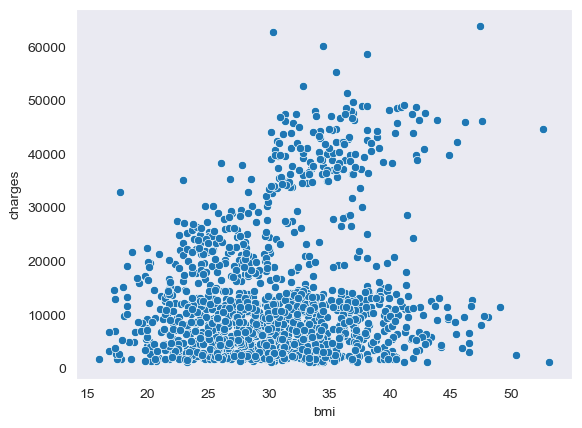

In [26]:
sns.set_style("dark")
sns.scatterplot(x = data["bmi"],y = data['charges']);

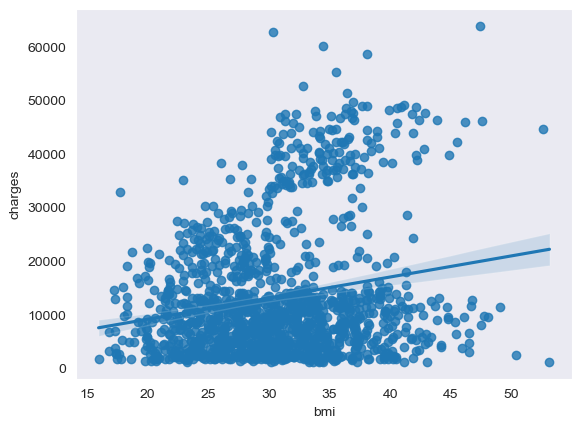

In [27]:
sns.set_style("dark")
sns.regplot(x = data["bmi"],y = data['charges']);

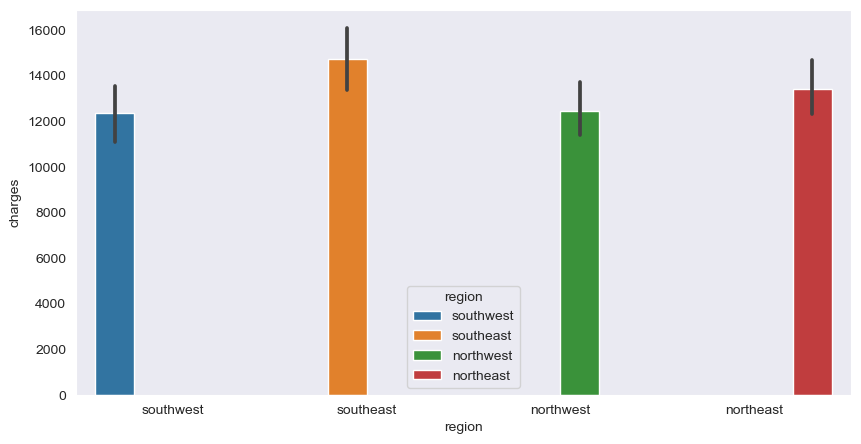

In [28]:
sns.set_style("dark")
plt.figure(figsize=[10,5])
sns.barplot(x = data["region"] , y = data['charges'],hue=data['region']);

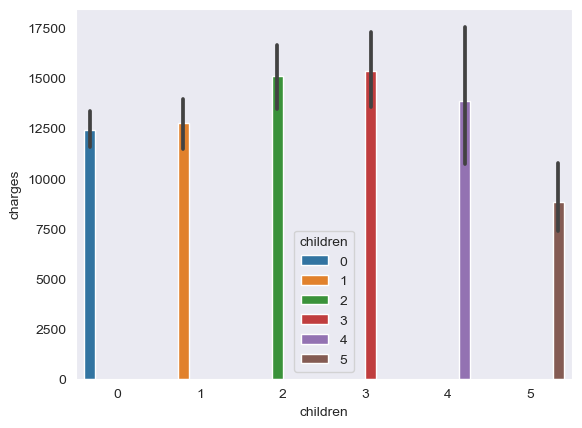

In [29]:
sns.set_style("dark")
sns.barplot(x = data["children"] , y = data['charges'],hue=data['children']);

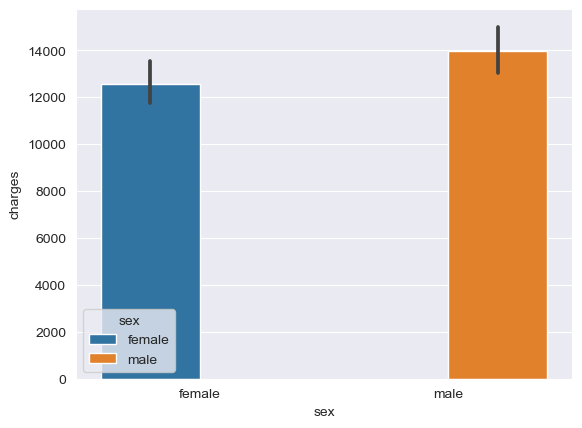

In [30]:
sns.set_style("darkgrid")
sns.barplot(x = data["sex"],y = data['charges'],hue=data['sex']);

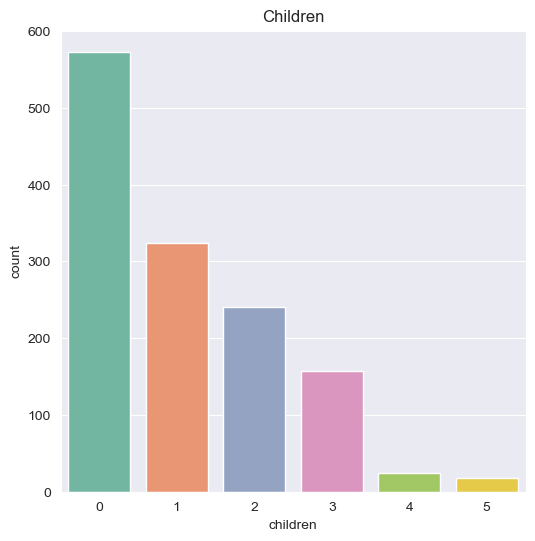

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data = data,palette='Set2')
plt.title("Children")
plt.show()

In [32]:
data['bmi'] = data['bmi'].astype(int)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1337 non-null   int64   
 1   sex             1337 non-null   object  
 2   bmi             1337 non-null   int32   
 3   children        1337 non-null   int64   
 4   smoker          1337 non-null   int64   
 5   region          1337 non-null   object  
 6   charges         1337 non-null   float64 
 7   bmi_categories  1337 non-null   category
dtypes: category(1), float64(1), int32(1), int64(3), object(2)
memory usage: 79.8+ KB


In [34]:
data['charges'] = data['charges'].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1337 non-null   int64   
 1   sex             1337 non-null   object  
 2   bmi             1337 non-null   int32   
 3   children        1337 non-null   int64   
 4   smoker          1337 non-null   int64   
 5   region          1337 non-null   object  
 6   charges         1337 non-null   int32   
 7   bmi_categories  1337 non-null   category
dtypes: category(1), int32(2), int64(3), object(2)
memory usage: 74.6+ KB


In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])
data['sex'] = encoder.fit_transform(data['sex'])

ValueError: could not convert string to float: 'Overweight'

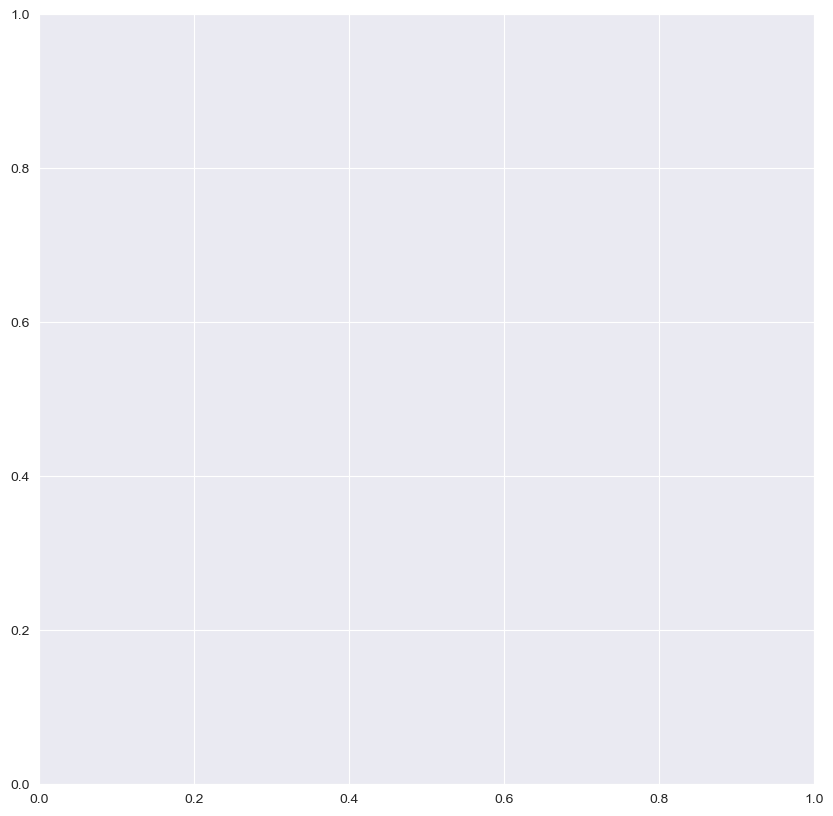

In [37]:
ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True)

In [38]:
df2 = data.drop(['region','sex','children'],axis=1)

In [39]:
df2

,age,bmi,smoker,charges,bmi_categories
0,19,27,1,16884,Overweight
1,18,33,0,1725,Overweight
2,28,33,0,4449,Overweight
3,33,22,0,21984,Normal weight
4,32,28,0,3866,Overweight
...,...,...,...,...,...
1333,50,30,0,10600,Overweight
1334,18,31,0,2205,Overweight
1335,18,36,0,1629,Overweight
1336,21,25,0,2007,Overweight


In [40]:
X = df2.drop(['charges'],axis=1)
y = df2['charges']

In [41]:
X

,age,bmi,smoker,bmi_categories
0,19,27,1,Overweight
1,18,33,0,Overweight
2,28,33,0,Overweight
3,33,22,0,Normal weight
4,32,28,0,Overweight
...,...,...,...,...
1333,50,30,0,Overweight
1334,18,31,0,Overweight
1335,18,36,0,Overweight
1336,21,25,0,Overweight


In [42]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1337, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 4) (1069, 4) (268, 4)


In [48]:
regressor=LinearRegression()

In [54]:
model = LinearRegression()

model.fit(X_train,y_train)

print('Test score', model.score(X_test, y_test))

ValueError: could not convert string to float: 'Normal weight'